<a href="https://colab.research.google.com/github/Devsah9051/sonar-mine-and-rock-prediction-using-logistic-regression/blob/main/SONAR_ROCK_AND_MINE_PREDICTION_with_onehot_encoding_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Sonar rock and stone prediction .

In [ ]:
# import the important libraries here :
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# extractt the data from csv into pandas datafraem but its doesn't have the header
df=pd.read_csv('/content/sonar dataset.csv',header=None)

In [ ]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [ ]:
df.isnull().sum()

,0
0,0
1,0
2,0
3,0
4,0
...,...
56,0
57,0
58,0
59,0


In [ ]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,...,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,0.029164,0.038437,0.043832,0.053892,0.075202,0.104570,0.121747,0.134799,0.178003,0.208259,...,0.016069,0.013420,0.010709,0.010941,0.009290,0.008222,0.007820,0.007949,0.007941,0.006507
std,0.022991,0.032960,0.038428,0.046528,0.055552,0.059105,0.061788,0.085152,0.118387,0.134416,...,0.012008,0.009634,0.007060,0.007301,0.007088,0.005736,0.005785,0.006470,0.006181,0.005031
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,...,0.000000,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600
25%,0.013350,0.016450,0.018950,0.024375,0.038050,0.067025,0.080900,0.080425,0.097025,0.111275,...,0.008425,0.007275,0.005075,0.005375,0.004150,0.004400,0.003700,0.003600,0.003675,0.003100
50%,0.022800,0.030800,0.034300,0.044050,0.062500,0.092150,0.106950,0.112100,0.152250,0.182400,...,0.013900,0.011400,0.009550,0.009300,0.007500,0.006850,0.005950,0.005800,0.006400,0.005300
75%,0.035550,0.047950,0.057950,0.064500,0.100275,0.134125,0.154000,0.169600,0.233425,0.268700,...,0.020825,0.016725,0.014900,0.014500,0.012100,0.010575,0.010425,0.010350,0.010325,0.008525
max,0.137100,0.233900,0.305900,0.426400,0.401000,0.382300,0.372900,0.459000,0.682800,0.710600,...,0.100400,0.070900,0.039000,0.035200,0.044700,0.039400,0.035500,0.044000,0.036400,0.043900


<Axes: xlabel='count', ylabel='60'>

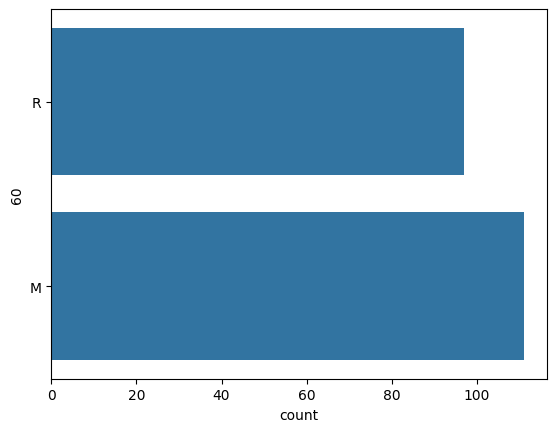

In [ ]:
sns.countplot(df[60])

In [ ]:
df[60].value_counts()

,count
60,
M,111
R,97


In [ ]:
df.groupby(60).mean()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
60,,,,,,,,,,,,,,,,,,,,,
M,0.034989,0.045544,0.050720,0.064768,0.086715,0.111864,0.128359,0.149832,0.213492,0.251022,...,0.019352,0.016014,0.011643,0.012185,0.009923,0.008914,0.007825,0.009060,0.008695,0.006930
R,0.022498,0.030303,0.035951,0.041447,0.062028,0.096224,0.114180,0.117596,0.137392,0.159325,...,0.012311,0.010453,0.009640,0.009518,0.008567,0.007430,0.007814,0.006677,0.007078,0.006024


In [ ]:
# label enocoding is doen here :
from sklearn.preprocessing import LabelEncoder
scaled =LabelEncoder()
df[60]=scaled.fit_transform(df[60])

In [ ]:
print(df)

         0       1       2       3       4       5       6       7       8   \
0    0.0200  0.0371  0.0428  0.0207  0.0954  0.0986  0.1539  0.1601  0.3109   
1    0.0453  0.0523  0.0843  0.0689  0.1183  0.2583  0.2156  0.3481  0.3337   
2    0.0262  0.0582  0.1099  0.1083  0.0974  0.2280  0.2431  0.3771  0.5598   
3    0.0100  0.0171  0.0623  0.0205  0.0205  0.0368  0.1098  0.1276  0.0598   
4    0.0762  0.0666  0.0481  0.0394  0.0590  0.0649  0.1209  0.2467  0.3564   
..      ...     ...     ...     ...     ...     ...     ...     ...     ...   
203  0.0187  0.0346  0.0168  0.0177  0.0393  0.1630  0.2028  0.1694  0.2328   
204  0.0323  0.0101  0.0298  0.0564  0.0760  0.0958  0.0990  0.1018  0.1030   
205  0.0522  0.0437  0.0180  0.0292  0.0351  0.1171  0.1257  0.1178  0.1258   
206  0.0303  0.0353  0.0490  0.0608  0.0167  0.1354  0.1465  0.1123  0.1945   
207  0.0260  0.0363  0.0136  0.0272  0.0214  0.0338  0.0655  0.1400  0.1843   

         9   ...      51      52      53      54   

In [ ]:
#Selected the columns :
df.columns

Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53,
       54, 55, 56, 57, 58, 59, 60],
      dtype='int64')

In [ ]:
# in x columns we drop the some selected columns and remove its :
X=df.drop([60],axis=1)

In [ ]:
print(X)

         0       1       2       3       4       5       6       7       8   \
0    0.0200  0.0371  0.0428  0.0207  0.0954  0.0986  0.1539  0.1601  0.3109   
1    0.0453  0.0523  0.0843  0.0689  0.1183  0.2583  0.2156  0.3481  0.3337   
2    0.0262  0.0582  0.1099  0.1083  0.0974  0.2280  0.2431  0.3771  0.5598   
3    0.0100  0.0171  0.0623  0.0205  0.0205  0.0368  0.1098  0.1276  0.0598   
4    0.0762  0.0666  0.0481  0.0394  0.0590  0.0649  0.1209  0.2467  0.3564   
..      ...     ...     ...     ...     ...     ...     ...     ...     ...   
203  0.0187  0.0346  0.0168  0.0177  0.0393  0.1630  0.2028  0.1694  0.2328   
204  0.0323  0.0101  0.0298  0.0564  0.0760  0.0958  0.0990  0.1018  0.1030   
205  0.0522  0.0437  0.0180  0.0292  0.0351  0.1171  0.1257  0.1178  0.1258   
206  0.0303  0.0353  0.0490  0.0608  0.0167  0.1354  0.1465  0.1123  0.1945   
207  0.0260  0.0363  0.0136  0.0272  0.0214  0.0338  0.0655  0.1400  0.1843   

         9   ...      50      51      52      53   

In [ ]:
#here I selected the columns which I drop in x coumns :

Y=df[[60]]
print(Y)

     60
0     1
1     1
2     1
3     1
4     1
..   ..
203   0
204   0
205   0
206   0
207   0

[208 rows x 1 columns]


In [ ]:
# import the library to split the data into test data and train data :
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [ ]:
# import the library for logistic regression which is the part of supervised leaning algorithm
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
# Here we fit the algrithmn in selected model :
model.fit(X_train,Y_train)


LogisticRegression()

In [ ]:
#Here I presdict the data using the testing data to checking the model working :
y_predict=model.predict(X_test)

In [ ]:
y_predict

array([0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1])

In [ ]:
# importing the evaluation models to check the performance of my model :
from sklearn.metrics import accuracy_score,f1_score

In [ ]:
# here We checking the model accuarcy :
model_accuracy=accuracy_score(Y_test,y_predict)
print(model_accuracy )


0.7857142857142857


In [ ]:
# Here I checking the F1 score of the model :
model_f1_score=f1_score(Y_test,y_predict)

In [ ]:
print(model_accuracy)
print(model_f1_score)

0.7857142857142857
0.7567567567567568


In [ ]:
#Here we testing the model using real values
imput_data=(0.0270,0.0092,0.0145,0.0278,0.0412,0.0757,0.1026,0.1138,0.0794,0.1520,0.1675,0.1370,0.1361,0.1345,0.2144,0.5354,0.6830,0.5600,0.3093,0.3226,0.4430,0.5573,0.5782,0.6173,0.8132,0.9819,0.9823,0.9166,0.7423,0.7736,0.8473,0.7352,0.6671,0.6083,0.6239,0.5972,0.5715,0.5242,0.2924,0.1536,0.2003,0.2031,0.2207,0.1778,0.1353,0.1373,0.0749,0.0472,0.0325,0.0179,0.0045,0.0084,0.0010,0.0018,0.0068,0.0039,0.0120,0.0132,0.0070,0.0088)
#here we make the array which stored the data :
array = np.asarray(imput_data)
new_data=array.reshape(1,-1)
prediction=model.predict(new_data)
print(prediction)


[1]


In [ ]:
# done the prediction :
if (prediction[0]==1):
  print("This is  the rock R")
else:
  print("This is the mine M")

This is  the rock R


In [ ]:
import joblib
joblib.dump(model,'sonar_rock_mine_prediction.pkl')

['sonar_rock_mine_prediction.pkl']